In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras import Input, models, layers, optimizers, metrics
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
from keras.models import Model

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_datagen = ImageDataGenerator()

In [11]:
train_generator = train_datagen.flow_from_directory(
    '../TeamProject/album/', 
    target_size= (48, 48), 
    batch_size=5, 
    class_mode= 'binary')
# 테스트셋의 정규화를 설정합니다.
test_datagen = ImageDataGenerator (rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '../TeamProject/album/', 
    target_size=(48,48), 
    batch_size=5, 
    class_mode= 'binary')
# VGG16 모델을 불러옵니다.
transfer_model = VGG16(weights='imagenet', input_shape= (48, 48, 3), include_top=False)
transfer_model.trainable = False
# 우리의 모델을 설정합니다.
finetune_model = models. Sequential ()
finetune_model.add(transfer_model)
finetune_model.add(Flatten ())
finetune_model.add(Dense (32))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout (0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary ()

Found 3296 images belonging to 4 classes.
Found 3296 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                16416     
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                    

Epoch 1/20
660/660 [==============================] - 25s 38ms/step - loss: -2958.0054 - accuracy: 0.3034 - val_loss: -201.6653 - val_accuracy: 0.3200
Epoch 2/20
660/660 [==============================] - 29s 44ms/step - loss: -3150.6208 - accuracy: 0.3034 - val_loss: -228.3116 - val_accuracy: 0.2200
Epoch 3/20
660/660 [==============================] - 30s 45ms/step - loss: -3489.0754 - accuracy: 0.3034 - val_loss: 95.3455 - val_accuracy: 0.1600
Epoch 4/20
660/660 [==============================] - 30s 46ms/step - loss: -3844.1150 - accuracy: 0.3034 - val_loss: -44.3240 - val_accuracy: 0.2800
Epoch 5/20
660/660 [==============================] - 30s 45ms/step - loss: -4110.3945 - accuracy: 0.3034 - val_loss: -378.5365 - val_accuracy: 0.2800
Epoch 6/20
660/660 [==============================] - 30s 46ms/step - loss: -4538.7642 - accuracy: 0.3034 - val_loss: -19.4742 - val_accuracy: 0.3000
Epoch 7/20
660/660 [==============================] - 30s 46ms/step - loss: -4913.1484 - accuracy:

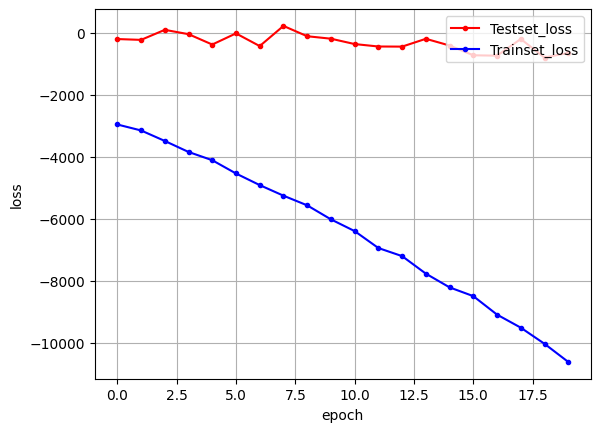

In [13]:
# 모델의 실행 옵션을 설정합니다.
finetune_model. compile(loss='binary_crossentropy', optimizer=optimizers.
Adam(learning_rate=0.0002), metrics= ['accuracy'])
# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델을 실행합니다.
history = finetune_model. fit(
train_generator, epochs=20, validation_data=test_generator, validation_steps=10, callbacks= [early_stopping_callback])
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history[ 'val_loss']
y_loss = history.history['loss']
# 그래프로 표현해 봅니다.
X_len = np. arange (len (y_loss))
plt.plot(X_len, y_vloss, marker='.', c="red", label= 'Testset_loss') 
plt.plot(X_len, y_loss, marker='.', color='blue', label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show ()

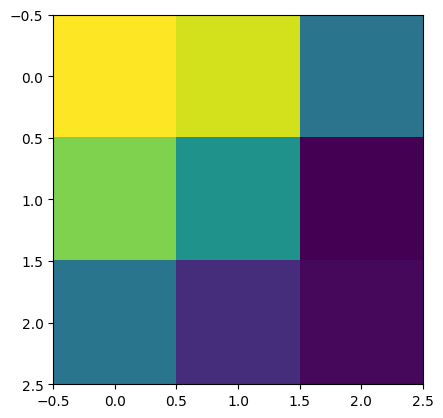

In [18]:
# 모델의 가중치 가져오기
weights = transfer_model.get_weights()

# 가중치 시각화 예제 (가중치 배열에 따라 다름)
plt.imshow(weights[0][:, :, 0, 0], cmap='viridis')

In [31]:
from keras.preprocessing import image
import numpy as np

# 이미지 파일 경로 설정
image_path = '../TeamProject/album/'
# image_path = '../TeamProject/album/2000/'
# image_path = '../TeamProject/album/2010/'
# image_path = '../TeamProject/album/2020/'

# 이미지를 불러와서 전처리
img = image.load_img(image_path, target_size=(48, 48))
input_image = image.img_to_array(img)
input_image = np.expand_dims(input_image, axis=0)
# input_image = preprocess_input(input_image)  # 전처리 방법에 따라 적절하게 사용

PermissionError: [Errno 13] Permission denied: '../TeamProject/album/'

In [20]:
from keras.models import Model

# 모델 정의
activation_model = Model(inputs=transfer_model.input, outputs=transfer_model.layers[1].output)

# 이미지를 모델에 주입하고 활성화 출력 추출
activation = activation_model.predict(input_image)

# 활성화 출력 시각화
plt.imshow(activation[0, :, :, 0], cmap='viridis')

NameError: name 'input_image' is not defined

In [21]:
from tensorflow.keras.models import Model

# 모델의 특정 레이어에서 특징 맵 추출
layer_name = 'block1_conv1'  # 원하는 레이어의 이름을 지정
feature_map_model = Model(inputs=transfer_model.input, outputs=transfer_model.get_layer(layer_name).output)
feature_maps = feature_map_model.predict(input_image)

# 특징 맵 시각화
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')

SyntaxError: invalid syntax (150917956.py, line 12)

In [22]:
from keras.models import Model

# 모델의 특정 레이어에서 특징 맵 추출
layer_name = 'block1_conv1'  # 원하는 레이어의 이름을 지정
feature_map_model = Model(inputs=transfer_model.input, outputs=transfer_model.get_layer(layer_name).output)
feature_maps = feature_map_model.predict(input_image)

# 특징 맵 시각화
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[3]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')



NameError: name 'input_image' is not defined

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import cv2

# 모델 로드 및 설정
model = VGG16(weights='imagenet')
grad_model = Model(inputs=model.input, outputs=model.get_layer('block5_conv3').output)

# 이미지 불러오기 및 전처리
img_path = 'path_to_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Grad-CAM 계산
with tf.GradientTape() as tape:
    last_conv_layer_output = grad_model(x)
    tape.watch(last_conv_layer_output)
    preds = model(x)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
last_conv_layer_output = last_conv_layer_output[0]

heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

# Grad-CAM 시각화
heatmap = heatmap.numpy()
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)